In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['dataset']


In [2]:
from subprocess import check_output
print(check_output(["ls", "../working"]).decode("utf8"))


__notebook__.ipynb
__output__.json



In [3]:
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

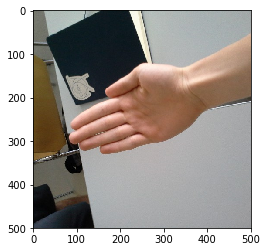

In [4]:
paper = cv2.imread('../input/dataset/dataset/train/paper/20140618_191650.jpg')
paper = cv2.cvtColor(paper,cv2.COLOR_BGR2RGB)
plt.imshow(paper)

In [5]:
type(paper)

numpy.ndarray

In [6]:
paper.shape

(500, 500, 3)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [8]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [9]:
image_gen.flow_from_directory('../input/dataset/dataset/train/')

Found 1474 images belonging to 3 classes.


In [10]:
image_shape=(150,150,3)

In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras import optimizers

In [12]:
from keras.models import model_from_json

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(3,activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [15]:
batch_size = 32

train_image_gen = image_gen.flow_from_directory('../input/dataset/dataset/train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 1474 images belonging to 3 classes.


In [16]:
test_image_gen = image_gen.flow_from_directory('../input/dataset/dataset/test/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 846 images belonging to 3 classes.


In [17]:
train_image_gen.class_indices

{'paper': 0, 'rock': 1, 'scissor': 2}

In [18]:
results = model.fit_generator(train_image_gen,epochs=50,steps_per_epoch=150
                              ,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/50
150/150 [==============================] - 62s 415ms/step - loss: 1.1829 - acc: 0.3271 - val_loss: 1.1028 - val_acc: 0.3047
Epoch 2/50
150/150 [==============================] - 58s 385ms/step - loss: 1.0909 - acc: 0.3864 - val_loss: 1.0482 - val_acc: 0.4479
Epoch 3/50
150/150 [==============================] - 57s 379ms/step - loss: 1.0460 - acc: 0.4648 - val_loss: 1.0015 - val_acc: 0.4973
Epoch 4/50
150/150 [==============================] - 57s 382ms/step - loss: 1.0046 - acc: 0.5085 - val_loss: 0.9970 - val_acc: 0.5078
Epoch 5/50
150/150 [==============================] - 57s 381ms/step - loss: 0.9463 - acc: 0.5621 - val_loss: 0.9321 - val_acc: 0.5410
Epoch 6/50
150/150 [==============================] - 57s 378ms/step - loss: 0.8908 - acc: 0.6008 - val_loss: 0.9519 - val_acc: 0.5469
Epoch 7/50
150/150 [==============================] - 57s 379ms/step - loss: 0.8197 - acc: 0.6321 - val_loss: 1.1456 - val_acc: 0.4891
Epoch 8/50
150/150 [==============================] - 5

In [19]:
model_json=model.to_json()

In [20]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [21]:
model.save_weights("model.h5")